In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
train = pd.read_csv("data/faces_train_data.csv")
test = pd.read_csv("data/faces_test_data.csv")

In [3]:
train.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
0,-1.861,1.350,-1.835,0.892,-1.756,0.458,-1.704,-0.000,-1.625,-0.458,...,-0.160,0.498,-0.343,0.183,-0.389,-0.026,-0.389,-0.210,-0.389,0
1,-1.920,1.523,-1.920,1.066,-1.833,0.571,-1.746,0.076,-1.571,-0.343,...,-0.076,0.742,-0.076,0.262,-0.267,0.000,-0.305,-0.262,-0.267,1
2,-1.247,1.177,-1.256,0.806,-1.183,0.403,-0.983,0.008,-0.746,-0.371,...,-0.055,1.247,0.016,0.464,-0.506,0.173,-0.553,-0.082,-0.537,1
3,-1.660,1.812,-1.701,1.324,-1.660,0.801,-1.620,0.314,-1.498,-0.139,...,-0.070,0.891,-0.035,0.283,-0.279,0.000,-0.279,-0.283,-0.244,0
4,-1.776,1.551,-1.693,1.140,-1.549,0.729,-1.363,0.318,-1.115,-0.075,...,-0.093,0.764,0.056,0.227,-0.112,0.041,-0.150,-0.145,-0.131,0


In [4]:
train.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,...,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,-1.931962,1.455752,-1.920338,1.004314,-1.858298,0.545549,-1.744761,0.089065,-1.550913,-0.333587,...,-0.111277,0.687324,-0.106768,0.223960,-0.263222,0.005834,-0.288294,-0.211278,-0.269045,0.486458
std,0.590181,0.402155,0.552056,0.380052,0.532371,0.361070,0.523245,0.343751,0.491355,0.321495,...,0.050815,0.209837,0.148709,0.086788,0.148332,0.073380,0.147636,0.083300,0.148305,0.499869
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.071000,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.000000
25%,-2.241000,1.247750,-2.204000,0.812750,-2.142250,0.361750,-2.039250,-0.086000,-1.839000,-0.505000,...,-0.142000,0.582000,-0.191000,0.188000,-0.356000,-0.024000,-0.383000,-0.252000,-0.361000,0.000000
50%,-1.952000,1.456000,-1.931000,1.011000,-1.854000,0.561000,-1.751000,0.104000,-1.576500,-0.319000,...,-0.110000,0.701000,-0.102000,0.224000,-0.242000,0.000000,-0.266000,-0.213000,-0.247000,0.000000
75%,-1.628750,1.676000,-1.626000,1.212250,-1.557750,0.750000,-1.451000,0.285250,-1.276000,-0.141000,...,-0.078000,0.823250,-0.018000,0.266000,-0.147000,0.035250,-0.169000,-0.175000,-0.152000,1.000000
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.655000,2.296000,...,0.288000,1.387000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,1.000000


In [5]:
test.describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,-1.924105,1.466505,-1.913906,1.015347,-1.854442,0.556578,-1.742358,0.100410,-1.549113,-0.322024,...,-0.109595,0.686934,-0.101417,0.221621,-0.256826,0.004443,-0.281469,-0.211166,-0.262411,0.493333
std,0.586384,0.412054,0.548511,0.389851,0.529543,0.368793,0.524712,0.348176,0.498277,0.322613,...,0.049170,0.202535,0.147125,0.082986,0.141866,0.073667,0.139187,0.087036,0.137586,0.500164
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.000000
25%,-2.250000,1.243000,-2.220250,0.816000,-2.150000,0.364000,-2.049000,-0.092250,-1.843000,-0.502250,...,-0.138000,0.580000,-0.180000,0.185750,-0.347000,-0.027000,-0.374000,-0.254000,-0.353000,0.000000
50%,-1.949000,1.465000,-1.921000,1.016000,-1.860500,0.562500,-1.758500,0.105500,-1.582500,-0.316500,...,-0.108000,0.704000,-0.097500,0.225000,-0.240000,0.000000,-0.263000,-0.213000,-0.244000,0.000000
75%,-1.626250,1.686500,-1.627750,1.221500,-1.562750,0.753500,-1.448500,0.302000,-1.282000,-0.128500,...,-0.078000,0.816000,-0.000000,0.264000,-0.142000,0.036000,-0.166000,-0.175000,-0.155000,1.000000
max,1.613000,3.641000,1.067000,3.205000,0.522000,2.718000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.269000,0.702000,0.603000,0.248000,0.411000,0.041000,0.259000,0.168000,1.000000


In [6]:
train.loc[train["smiling"] == 0].describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.00000,2465.000000,...,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2465.0
mean,-1.923728,1.471475,-1.911546,1.024303,-1.845065,0.569687,-1.727250,0.120204,-1.53576,-0.296385,...,-0.124742,0.609094,-0.149288,0.199250,-0.212896,0.004393,-0.232967,-0.188240,-0.217277,0.0
std,0.669758,0.455191,0.630175,0.428830,0.611962,0.405107,0.602278,0.383223,0.56463,0.356690,...,0.052785,0.197007,0.146782,0.086241,0.138378,0.075705,0.134734,0.081351,0.138953,0.0
min,-3.979000,-2.111000,-3.872000,-2.054000,-3.737000,-1.940000,-3.468000,-2.180000,-3.07100,-2.345000,...,-0.319000,-0.441000,-0.897000,-0.448000,-1.142000,-0.597000,-1.162000,-0.746000,-1.154000,0.0
25%,-2.289000,1.242000,-2.260000,0.812000,-2.199000,0.366000,-2.088000,-0.073000,-1.88300,-0.484000,...,-0.158000,0.528000,-0.229000,0.173000,-0.264000,-0.022000,-0.280000,-0.227000,-0.270000,0.0
50%,-1.960000,1.480000,-1.931000,1.039000,-1.852000,0.594000,-1.743000,0.147000,-1.57200,-0.271000,...,-0.124000,0.636000,-0.144000,0.206000,-0.177000,0.000000,-0.193000,-0.199000,-0.183000,0.0
75%,-1.574000,1.723000,-1.552000,1.256000,-1.472000,0.796000,-1.353000,0.343000,-1.19200,-0.083000,...,-0.091000,0.733000,-0.062000,0.235000,-0.126000,0.031000,-0.150000,-0.162000,-0.130000,0.0
max,1.984000,3.461000,1.617000,3.132000,1.213000,2.747000,0.808000,2.473000,0.65500,2.296000,...,0.288000,1.211000,0.725000,0.725000,0.336000,0.544000,0.144000,0.369000,0.318000,0.0


In [7]:
train.loc[train["smiling"] == 1].describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.0
mean,-1.940654,1.439154,-1.929619,0.983212,-1.872268,0.520067,-1.763248,0.056192,-1.566910,-0.372860,...,-0.097063,0.769910,-0.061879,0.250046,-0.316350,0.007355,-0.346702,-0.235599,-0.323695,1.0
std,0.492410,0.336540,0.455225,0.319344,0.432446,0.305847,0.423472,0.292947,0.399184,0.274225,...,0.044433,0.190458,0.137111,0.079433,0.139735,0.070827,0.137861,0.078284,0.137920,0.0
min,-3.719000,-0.084000,-3.616000,-0.507000,-3.520000,-0.957000,-3.293000,-1.351000,-2.906000,-1.661000,...,-0.276000,-0.055000,-0.828000,-0.215000,-1.027000,-0.378000,-1.094000,-0.640000,-1.083000,1.0
25%,-2.209500,1.253000,-2.171000,0.813000,-2.096500,0.358000,-1.995500,-0.100000,-1.800000,-0.523000,...,-0.126000,0.668500,-0.141000,0.213000,-0.400500,-0.025500,-0.431000,-0.278000,-0.408000,1.0
50%,-1.947000,1.442000,-1.929000,0.987000,-1.858000,0.531000,-1.763000,0.076000,-1.580000,-0.355000,...,-0.095000,0.788000,-0.059000,0.250000,-0.324000,0.000000,-0.358000,-0.234000,-0.330000,1.0
75%,-1.675000,1.636500,-1.666500,1.171000,-1.622500,0.700000,-1.518500,0.230000,-1.336000,-0.201000,...,-0.068000,0.894000,0.022000,0.294000,-0.218000,0.041000,-0.250500,-0.195000,-0.226000,1.0
max,0.214000,3.210000,-0.080000,2.655000,-0.336000,2.099000,-0.357000,1.482000,-0.211000,0.864000,...,0.099000,1.387000,0.553000,0.723000,-0.000000,0.428000,-0.059000,0.186000,0.033000,1.0


In [8]:
test.loc[test["smiling"] == 0].describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,...,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0
mean,-1.924752,1.463143,-1.910474,1.017789,-1.844225,0.566248,-1.725278,0.119426,-1.532875,-0.295164,...,-0.123036,0.609617,-0.141867,0.197806,-0.205095,0.004628,-0.225551,-0.187484,-0.211433,0.0
std,0.672379,0.463935,0.634122,0.436303,0.617002,0.410027,0.611666,0.384095,0.579253,0.354103,...,0.050851,0.187267,0.146842,0.079944,0.131766,0.074741,0.125595,0.086454,0.127334,0.0
min,-3.846000,-2.116000,-3.673000,-2.341000,-3.487000,-2.539000,-3.287000,-2.624000,-3.005000,-2.511000,...,-0.280000,-0.133000,-0.672000,-0.282000,-1.087000,-0.507000,-1.109000,-0.732000,-1.087000,0.0
25%,-2.311000,1.206750,-2.265750,0.785500,-2.198500,0.342000,-2.108500,-0.099750,-1.915000,-0.503250,...,-0.156250,0.521750,-0.214000,0.168750,-0.261000,-0.026250,-0.274000,-0.229000,-0.261250,0.0
50%,-1.952500,1.473000,-1.932000,1.031000,-1.861500,0.594500,-1.755500,0.146000,-1.582500,-0.274000,...,-0.120500,0.636000,-0.137000,0.206000,-0.174000,0.000000,-0.188000,-0.196500,-0.177000,0.0
75%,-1.587250,1.733250,-1.558000,1.275250,-1.458750,0.801250,-1.352250,0.341000,-1.173250,-0.085750,...,-0.093000,0.733250,-0.059750,0.239000,-0.127000,0.036000,-0.149750,-0.159750,-0.135000,0.0
max,1.613000,2.899000,1.067000,2.834000,0.522000,2.705000,0.000000,2.510000,0.309000,2.213000,...,0.248000,1.078000,0.702000,0.440000,0.248000,0.330000,0.041000,0.259000,0.168000,0.0


In [9]:
test.loc[test["smiling"] == 1].describe()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y63,x64,y64,x65,y65,x66,y66,x67,y67,smiling
count,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,...,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.000000,592.0
mean,-1.923441,1.469958,-1.917431,1.012838,-1.864934,0.546645,-1.759900,0.080880,-1.565791,-0.349610,...,-0.095791,0.766341,-0.059873,0.246079,-0.309954,0.004253,-0.338899,-0.235488,-0.314767,1.0
std,0.482960,0.351248,0.444255,0.335878,0.421525,0.321031,0.416766,0.306043,0.398164,0.284367,...,0.043272,0.186377,0.135483,0.078896,0.131979,0.072609,0.128769,0.080761,0.127797,0.0
min,-3.327000,-1.039000,-3.286000,-1.385000,-3.253000,-1.707000,-3.109000,-1.954000,-2.793000,-2.053000,...,-0.229000,0.122000,-0.526000,-0.098000,-0.895000,-0.377000,-0.951000,-0.613000,-0.932000,1.0
25%,-2.201250,1.261750,-2.172250,0.830000,-2.124000,0.384000,-2.005250,-0.084000,-1.808000,-0.500750,...,-0.126000,0.664000,-0.138250,0.208000,-0.397000,-0.029000,-0.417250,-0.282000,-0.401250,1.0
50%,-1.934000,1.462500,-1.915000,1.005500,-1.860500,0.532500,-1.762000,0.075000,-1.582000,-0.352000,...,-0.093000,0.781000,-0.053500,0.247000,-0.318500,0.000000,-0.350000,-0.236000,-0.326000,1.0
75%,-1.680000,1.649000,-1.684750,1.184750,-1.630500,0.712250,-1.531500,0.246000,-1.367750,-0.193000,...,-0.066750,0.884000,0.023000,0.290000,-0.220750,0.037250,-0.250000,-0.196000,-0.220000,1.0
max,0.000000,3.641000,-0.256000,3.205000,-0.475000,2.718000,-0.487000,2.179000,-0.279000,1.564000,...,0.074000,1.269000,0.388000,0.603000,-0.000000,0.411000,-0.038000,0.218000,0.025000,1.0


In [10]:
train_not_smiling_coords = test.loc[test["smiling"] == 0].describe().loc["mean"]
train_smiling_coords = test.loc[test["smiling"] == 1].describe().loc["mean"]

In [11]:
nsxs = []
nsys = []

sxs = []
sys = []

for i in range(68):
    nsxs.append(train_not_smiling_coords[f"x{i}"])
    nsys.append(train_not_smiling_coords[f"y{i}"])
    
    sxs.append(train_smiling_coords[f"x{i}"])
    sys.append(train_smiling_coords[f"y{i}"])

Text(0,0.5,'y')

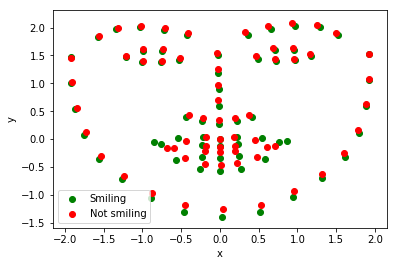

In [12]:
plt.scatter(sxs, sys, label = "Smiling", color = 'g')
plt.scatter(nsxs, nsys, label = "Not smiling", color = 'r')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")

In [13]:
X_train = train.drop("smiling", axis = 1)
X_test = test.drop("smiling", axis = 1)
y_train = train.smiling
y_test = test.smiling

for d in (2, 8, 20):
    model = DecisionTreeClassifier(random_state = 2001, max_depth = d)
    model.fit(X_train, y_train)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f"Model with max depth {d}: train acc = {train_score}, test acc = {test_score}")
    

Model with max depth 2: train acc = 0.7947916666666667, test acc = 0.7816666666666666
Model with max depth 8: train acc = 0.9335416666666667, test acc = 0.8408333333333333
Model with max depth 20: train acc = 1.0, test acc = 0.8158333333333333
